In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from google.colab import drive
import geopandas as gpd
import plotly.express as px

Reference: https://www.nyc.gov/site/nypd/stats/reports-analysis/subway-fare-evasion.page

In [2]:
# Prompt the user to enter the Quarter Number
quarter = input("Enter the Quarter Number (Q1, Q2, Q3 or Q4): ")

# Prompt the user to enter the Year Number
year = input("Enter the Year Number (2020 to 2023): ")

Enter the Quarter Number (Q1, Q2, Q3 or Q4): Q4
Enter the Year Number (2020 to 2023): 2023


In [3]:
# URL of the webpage
url = "https://www.nyc.gov/site/nypd/stats/reports-analysis/subway-fare-evasion.page"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the download link for the Excel file
    download_link = None
    for a_tag in soup.find_all("a"):
        if f"Fare Evasion Arrests - {quarter}, {year}" in a_tag.text:
            download_link = a_tag.get("href")
            break

# Create absolute URL for the download link
absolute_download_link = urljoin(url, download_link)

In [4]:
# Determine previous quarter and year
quarters = ["Q1", "Q2", "Q3", "Q4"]
prev_quarter_index = (quarters.index(quarter) - 1) % len(quarters)
prev_year = year

# If previous quarter was Q4, decrement the year
if prev_quarter_index == 3:
  prev_year = str(int(year) - 1)

# Find the download link for the Excel file for the previous quarter and year
for a_tag in soup.find_all("a"):
  if f"Fare Evasion Arrests - {quarters[prev_quarter_index]}, {prev_year}" in a_tag.text:
    prev_download_link = a_tag.get("href")
    break

# Create absolute URL for the download link
old_download_link = urljoin(url, prev_download_link)

In [29]:
# Read a specific sheet from the Excel file into a DataFrame
sheet_name = "Citywide"  # Change this to the name of the sheet you want to read
df = pd.read_excel(absolute_download_link, sheet_name=sheet_name)

# Display the DataFrame
df.head()

,Unnamed: 0,Subway Fare Evasion\n(Penal Law § 165.15(3))\nArrest Report,Unnamed: 2,Unnamed: 3
0,NaN,NaN,4th Quarter 2023,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,Citywide,NaN
3,NaN,"Arrests by Gender, Race, and Age Group",NaN,NaN
4,NaN,NaN,NaN,NaN


In [6]:
# Define the Lists
race = ["AMER IND", "ASIAN/PAC.ISL", "BLACK", "HISPANIC", "UNKNOWN", "WHITE"]
age_bracket = ["10 - 17", "18 - 24", "25 - 40", "41 - 59", "60+"]
gender = ["MALE", "FEMALE", "UNKNOWN"]

# Initialize dictionaries
race_dict = {r: 0 for r in race}
age_dict = {age: 0 for age in age_bracket}
gender_dict = {g: 0 for g in gender}
total_dict = {}

# Iterate over DataFrame rows
for index, row in df.iterrows():
    if row['Unnamed: 2'] in race:
        race_dict[row['Unnamed: 2']] = int(row['Unnamed: 3'])
    elif row['Unnamed: 2'] in age_bracket:
        age_dict[row['Unnamed: 2']] = int(row['Unnamed: 3'])
    elif row['Unnamed: 2'] in gender:
        gender_dict[row['Unnamed: 2']] = int(row['Unnamed: 3'])
    elif row['Unnamed: 2'] == 'Grand Total':
        total_dict[row['Unnamed: 2']] = int(row['Unnamed: 3'])

print("Race Dictionary:", race_dict)
print("Age Dictionary:", age_dict)
print("Gender Dictionary:", gender_dict)
print("Total Dictionary:", total_dict)

Race Dictionary: {'AMER IND': 1, 'ASIAN/PAC.ISL': 23, 'BLACK': 785, 'HISPANIC': 365, 'UNKNOWN': 3, 'WHITE': 75}
Age Dictionary: {'10 - 17': 8, '18 - 24': 209, '25 - 40': 664, '41 - 59': 336, '60+': 35}
Gender Dictionary: {'MALE': 1182, 'FEMALE': 70, 'UNKNOWN': 0}
Total Dictionary: {'Grand Total': 1252}


In [28]:
# Read a specific sheet from the Excel file into a DataFrame
sheet_name = "Citywide"  # Change this to the name of the sheet you want to read
df_prev = pd.read_excel(old_download_link, sheet_name=sheet_name)

# Display the DataFrame
df_prev.head()

,Unnamed: 0,Subway Fare Evasion\n(Penal Law § 165.15(3))\nArrest Report,Unnamed: 2,Unnamed: 3
0,NaN,NaN,3rd Quarter 2023,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,Citywide,NaN
3,NaN,"Arrests by Gender, Race, and Age Group",NaN,NaN
4,NaN,NaN,NaN,NaN


In [8]:
# Initialize dictionaries
prev_race_dict = {r: 0 for r in race}
prev_age_dict = {age: 0 for age in age_bracket}
prev_gender_dict = {g: 0 for g in gender}
prev_total_dict = {}

# Iterate over DataFrame rows
for index, row in df_prev.iterrows():
    if row['Unnamed: 2'] in race:
        prev_race_dict[row['Unnamed: 2']] = int(row['Unnamed: 3'])
    elif row['Unnamed: 2'] in age_bracket:
        prev_age_dict[row['Unnamed: 2']] = int(row['Unnamed: 3'])
    elif row['Unnamed: 2'] in gender:
        prev_gender_dict[row['Unnamed: 2']] = int(row['Unnamed: 3'])
    elif row['Unnamed: 2'] == 'Grand Total':
        prev_total_dict[row['Unnamed: 2']] = int(row['Unnamed: 3'])

print("Race Dictionary:", prev_race_dict)
print("Age Dictionary:", prev_age_dict)
print("Gender Dictionary:", prev_gender_dict)
print("Total Dictionary:", prev_total_dict)

Race Dictionary: {'AMER IND': 1, 'ASIAN/PAC.ISL': 23, 'BLACK': 687, 'HISPANIC': 360, 'UNKNOWN': 2, 'WHITE': 69}
Age Dictionary: {'10 - 17': 3, '18 - 24': 208, '25 - 40': 599, '41 - 59': 309, '60+': 23}
Gender Dictionary: {'MALE': 1068, 'FEMALE': 63, 'UNKNOWN': 0}
Total Dictionary: {'Grand Total': 1142}


### PLOT FOR RACE

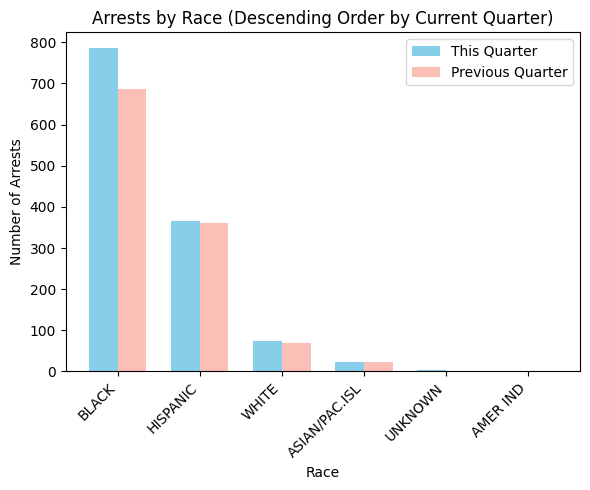

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data for this quarter
race_values = list(race_dict.values())
prev_race_values = list(prev_race_dict.values())

# Categories
categories_race = race
x_race = np.arange(len(categories_race))
bar_width = 0.35

# Sort the data in descending order by current quarter values
sorted_data = sorted(zip(race_values, prev_race_values, categories_race), reverse=True)
sorted_race_values, sorted_prev_race_values, sorted_categories_race = zip(*sorted_data)

# Plotting
plt.figure(figsize=(6, 5))

plt.bar(x_race - bar_width/2, sorted_race_values, bar_width, color='skyblue', label='This Quarter')
plt.bar(x_race + bar_width/2, sorted_prev_race_values, bar_width, color='salmon', label='Previous Quarter', alpha=0.5)

plt.xticks(x_race, sorted_categories_race, rotation=45, ha='right')
plt.title('Arrests by Race (Descending Order by Current Quarter)')
plt.xlabel('Race')
plt.ylabel('Number of Arrests')
plt.legend()
plt.tight_layout()
plt.show()

### PLOT FOR AGE BRACKET

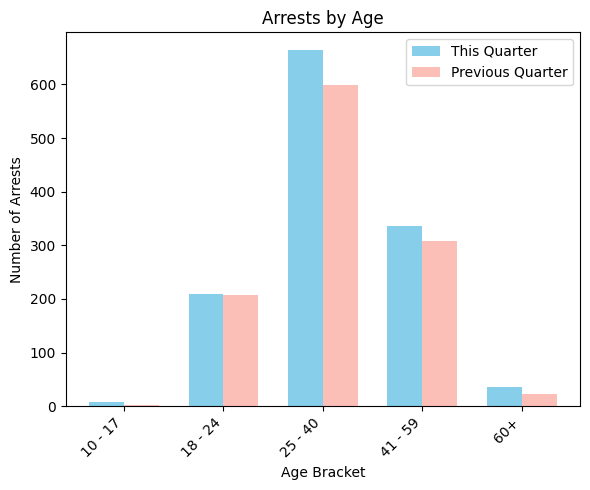

In [10]:
# Data for this quarter
age_values = list(age_dict.values())
prev_age_values = list(prev_age_dict.values())

# Categories
categories_age = age_bracket
x_age = np.arange(len(categories_age))
bar_width = 0.35

# Plotting
plt.figure(figsize=(6, 5))
plt.bar(x_age - bar_width/2, age_values, bar_width, color='skyblue', label='This Quarter')
plt.bar(x_age + bar_width/2, prev_age_values, bar_width, color='salmon', label='Previous Quarter', alpha=0.5)
plt.xticks(x_age, categories_age, rotation=45, ha='right')
plt.title('Arrests by Age')
plt.xlabel('Age Bracket')
plt.ylabel('Number of Arrests')
plt.legend()
plt.tight_layout()
plt.show()

### PLOT FOR GENDER

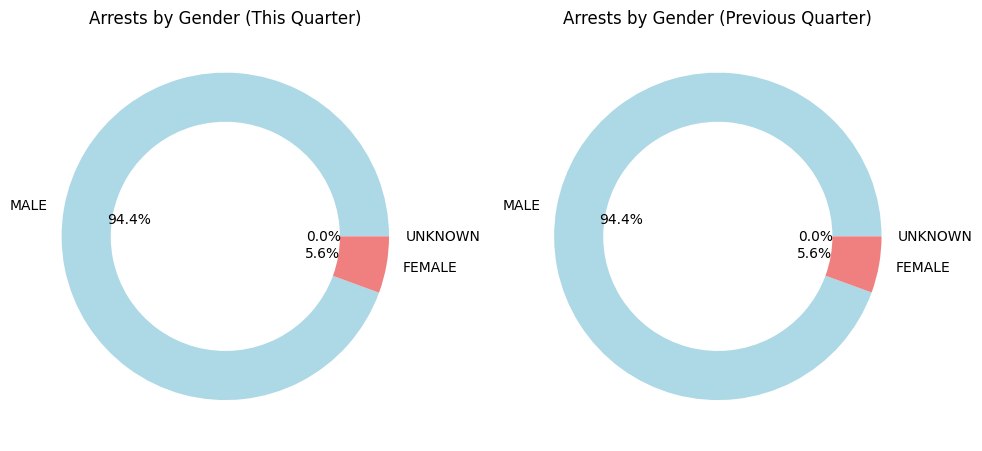

In [11]:
# Data for this quarter
gender_values = list(gender_dict.values())
prev_gender_values = list(prev_gender_dict.values())

# Categories
categories_gender = gender

# Plotting donut chart for this quarter
plt.figure(figsize=(10, 5))

# Plotting donut chart for this quarter
plt.subplot(1, 2, 1)
plt.pie(gender_values, labels=categories_gender, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], wedgeprops=dict(width=0.3))
plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white'))
plt.title('Arrests by Gender (This Quarter)')

# Plotting donut chart for previous quarter
plt.subplot(1, 2, 2)
plt.pie(prev_gender_values, labels=categories_gender, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], wedgeprops=dict(width=0.3))
plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white'))
plt.title('Arrests by Gender (Previous Quarter)')

plt.tight_layout()
plt.show()


### TOTAL NUMBER OF ARRESTS

In [12]:
# Calculating Total Arrests
total_value = np.array(list(total_dict.values()))
prev_total_value = np.array(list(prev_total_dict.values()))

# Calculate the percent change
# Make sure to handle the case where total_value might be 0 to avoid division by zero errors
with np.errstate(divide='ignore', invalid='ignore'):
    Percent_Change = (total_value - prev_total_value) / prev_total_value * 100

In [13]:
print(total_value.item())

1252


In [14]:
# Calculating Percent Change
percentage_str = f"{Percent_Change.item():.1f}%"

print(percentage_str)

9.6%


### BOROUGH & STATION WISE ANALYSIS

In [15]:
# Read a specific sheet from the Excel file into a DataFrame
sheet_name = "Stations-Gender"  # Change this to the name of the sheet you want to read
df2 = pd.read_excel(absolute_download_link, sheet_name=sheet_name)

# Display the DataFrame
df2

,Subway Fare Evasion\n(Penal Law § 165.15(3))\nArrest Report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,4th Quarter 2023,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Station,NaN,NaN,NaN,NaN
3,Arrests by Gender,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
432,(blank),0,1,0,1
433,STATEN ISLAND,1,22,0,23
434,(blank),1,22,0,23
435,(blank),1,22,0,23


In [16]:
boroughs = ["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"]

station_names = [
    "138 ST.-GRAND CONCOURSE", "149 ST.-GRAND CONCOURSE", "161 ST.-YANKEE STADIUM", "167 STREET", "170 STREET",
    "176 STREET", "183 STREET", "233 STREET", "238 ST.-NEREID AVE.", "241 ST.-WAKEFIELD", "3 AVENUE-138 STREET",
    "3 AVENUE-149 STREET", "ALLERTON AVENUE", "BEDFORD PK. BLVD.", "BEDFORD PK. BLVD.-LEHMAN COLLEGE",
    "BRONX PARK EAST", "BROOK AVENUE", "BURNSIDE AVENUE", "CASTLE HILL AVENUE", "CYPRESS AVENUE",
    "DYRE AVE.-EASTCHESTER", "EAST 149 STREET", "EAST 174 STREET", "EAST 177 ST.-PARKCHESTER",
    "EAST 180 STREET", "EAST TREMONT AVE.-WEST FARMS SQ.", "ELDER AVENUE", "Fordham Rd/Grand Concource",
    "FORDHAM ROAD", "FREEMAN STREET", "GUN HILL ROAD", "HUNTS POINT AVENUE", "INTERVALE AVENUE",
    "JACKSON AVENUE", "KINGSBRIDGE ROAD", "LONGWOOD AVENUE", "MOSHOLU PKWY.", "PELHAM PKWY.",
    "PROSPECT AVENUE", "SIMPSON STREET", "SOUNDVIEW AVENUE", "ST. LAWRENCE AVENUE", "TREMONT AVENUE",
    "WHITLOCK AVENUE", "WOODLAWN", "25 AVENUE", "25 STREET", "36 STREET", "4 AVENUE-9 STREET", "45 STREET",
    "50 STREET", "53 STREET", "59 STREET", "7 AVENUE", "79 STREET", "86 STREET", "9TH STREET", "ALABAMA AVENUE",
    "ATLANTIC AVENUE", "AVENUE \"J\"", "AVENUE \"M\"", "AVENUE \"U\"", "BEDFORD AVENUE", "BERGEN STREET",
    "BEVERLY ROAD", "BOROUGH HALL", "BRIGHTON BEACH", "BROADWAY-EAST NEW YORK", "BROADWAY-EASTERN PKWY",
    "CHURCH AVENUE", "CLINTON-WASHINGTON AVENUES", "CRESCENT STREET", "DEKALB AVENUE", "EAST 105 STREET",
    "EUCLID AVENUE", "FLATBUSH AVE.-BROOKLYN COLLEGE", "FLUSHING AVENUE", "FORT HAMILTON PKWY", "FRANKLIN AVENUE",
    "FULTON STREET", "GATES AVENUE", "GRANT AVENUE", "HIGH STREET", "HOYT STREET", "HOYT-SCHERMERHORN",
    "JAY STREET-BOROUGH HALL", "JEFFERSON STREET", "JUNIUS STREET", "KINGS HIGHWAY", "KINGSTON AVENUE",
    "KINGSTON-THROOP AVENUES", "LIBERTY AVENUE", "LIVONIA AVENUE", "LORIMER STREET", "METROPOLITAN AVENUE",
    "MORGAN AVENUE", "MYRTLE AVENUE", "NASSAU AVENUE", "NEVINS STREET", "NEW LOTS AVENUE", "NOSTRAND AVENUE",
    "OCEAN PKWY", "PACIFIC STREET", "PENNSYLVANIA AVENUE", "PROSPECT PARK", "RALPH AVENUE", "ROCKAWAY AVENUE",
    "SARATOGA AVENUE", "SHEEPSHEAD BAY", "SHEPHERD AVENUE", "SMITH-9 STREETS", "STILLWELL AVENUE-CONEY ISLAND",
    "SUTTER AVENUE-RUTLAND ROAD", "UNION STREET", "UTICA AVE.-CROWN HEIGHTS", "UTICA AVENUE", "VAN SICLEN AVENUE",
    "WEST 8 STREET-NY AQUARIUM", "WINTHROP STREET", "WYCKOFF AVENUE", "1 AVENUE", "110 ST.-CENTRAL PARK NORTH",
    "116 STREET", "125 STREET", "135 STREET", "137 ST.-CITY COLLEGE", "14 ST.-UNION SQUARE", "14 STREET",
    "145 STREET", "155 STREET", "168 ST.-WASHINGTON HTS.", "175 STREET", "181 STREET", "191 STREET",
    "200 ST.-DYCKMAN ST.", "23 STREET", "28 STREET", "33 STREET", "34 ST.-HERALD SQ.", "34 ST.-PENN STATION",
    "34 STREET", "42 ST.-GRAND CENTRAL", "42 ST.-PORT AUTHORITY BUS TERMINAL", "42 ST.-TIMES SQUARE",
    "42 STREET", "47-50 STS./ROCKEFELLER CTR.", "49 STREET", "50 STREET", "51 STREET", "57 STREET",
    "59 ST.-COLUMBUS CIRCLE", "59 STREET", "86 STREET", "96 STREET", "BLEECKER STREET", "BOWERY", "BROADWAY/NASSAU",
    "BROOKLYN BRIDGE-CITY HALL", "CANAL STREET", "FULTON STREET", "LEXINGTON AVENUE", "PRINCE STREET", "SOUTH FERRY",
    "UNION SQUARE", "W. 4 STREET", "103 ST.-CORONA PLAZA", "169 STREET", "179 ST.-JAMAICA",
    "45 ROAD-COURT HOUSE SQUARE", "46 STREET", "61 ST.-WOODSIDE", "63 DRIVE-REGO PARK", "69 STREET",
    "74 ST.-BROADWAY", "ASTORIA BLVD.", "BEACH 67 STREET", "COURT SQUARE", "DITMARS BLVD.-ASTORIA",
    "ELMHURST AVE.", "FAR ROCKAWAY-MOTT AVE.", "HUNTERS POINT AVENUE", "LEFFERTS BLVD.", "MAIN ST.-FLUSHING",
    "MYRTLE/WYCKOFF AVENUES", "PARSONS BLVD.", "PARSONS/ARCHER-JAMAICA CENTER", "QUEENS PLAZA", "QUEENSBORO PLAZA",
    "ROCKAWAY BLVD.", "ROOSEVELT AVE.-JACKSON HEIGHTS", "SUTPHIN BLVD.-ARCHER AVE.", "UNION TURNPIKE-KEW GARDENS", "WILLETS POINT-SHEA STADIUM", "WOODHAVEN BLVD."
]

In [21]:
# Create dictionaries to store counts for boroughs and stations
borough_counts = {borough: 0 for borough in boroughs}
station_counts = {station: 0 for station in station_names}

# Iterate over the subway data and update counts
for index, row in df2.iterrows():
    name = row["Subway Fare Evasion\n(Penal Law § 165.15(3))\nArrest Report"]

    # Check if the value is a float (indicating NaN) and skip processing if it is
    if isinstance(name, float):
        continue

    # Convert to uppercase and strip leading/trailing whitespaces
    name = name.upper().strip()

    # Skip processing if the name is not a borough or station
    if name not in boroughs and name not in station_names:
        continue

    count_str = str(row["Unnamed: 4"])  # Convert to string to handle 'Grand Total'

    # Skip processing if the count value is not a valid integer or 'Grand Total'
    if not (count_str.isdigit() or count_str == 'Grand Total'):
        continue

    if count_str.isdigit():
        count = int(count_str)
    else:
        count = 0  # Set count to 0 for 'Grand Total'

    # Check if the name is a borough or a station
    if name in borough_counts:
        borough_counts[name] += count
    elif name in station_counts:
        station_counts[name] += count

# Print the dictionaries
print("Borough Counts:")
print(borough_counts)
print("\nStation Counts:")
print(station_counts)

Borough Counts:
{'BRONX': 404, 'BROOKLYN': 472, 'MANHATTAN': 261, 'QUEENS': 92, 'STATEN ISLAND': 23}

Station Counts:
{'138 ST.-GRAND CONCOURSE': 1, '149 ST.-GRAND CONCOURSE': 10, '161 ST.-YANKEE STADIUM': 62, '167 STREET': 3, '170 STREET': 17, '176 STREET': 9, '183 STREET': 1, '233 STREET': 2, '238 ST.-NEREID AVE.': 1, '241 ST.-WAKEFIELD': 11, '3 AVENUE-138 STREET': 3, '3 AVENUE-149 STREET': 58, 'ALLERTON AVENUE': 1, 'BEDFORD PK. BLVD.': 1, 'BEDFORD PK. BLVD.-LEHMAN COLLEGE': 2, 'BRONX PARK EAST': 2, 'BROOK AVENUE': 8, 'BURNSIDE AVENUE': 6, 'CASTLE HILL AVENUE': 4, 'CYPRESS AVENUE': 1, 'DYRE AVE.-EASTCHESTER': 1, 'EAST 149 STREET': 14, 'EAST 174 STREET': 6, 'EAST 177 ST.-PARKCHESTER': 1, 'EAST 180 STREET': 18, 'EAST TREMONT AVE.-WEST FARMS SQ.': 6, 'ELDER AVENUE': 4, 'Fordham Rd/Grand Concource': 0, 'FORDHAM ROAD': 6, 'FREEMAN STREET': 9, 'GUN HILL ROAD': 24, 'HUNTS POINT AVENUE': 24, 'INTERVALE AVENUE': 4, 'JACKSON AVENUE': 4, 'KINGSBRIDGE ROAD': 10, 'LONGWOOD AVENUE': 2, 'MOSHOLU PK

In [22]:
drive.mount('/content/drive', force_remount = True)

# Load the shapefile (update the path as necessary)
shapefile_path = '/content/drive/MyDrive/mtawebapp/geo_export_b98d7ad7-d31a-4319-b877-72f88ebddf59.shp'
gdf = gpd.read_file(shapefile_path)

# Ensure the GeoDataFrame is in the right projection (latitude and longitude)
gdf = gdf.to_crs(epsg=4326)

Mounted at /content/drive


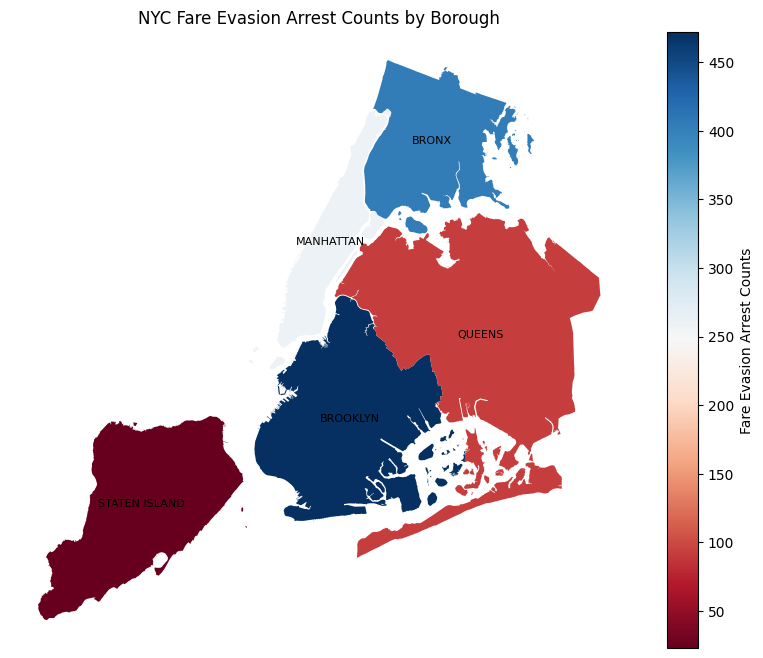

In [24]:
# Convert the arrest counts dictionary to a DataFrame
counts_df = pd.DataFrame(list(borough_counts.items()), columns=['boro_name', 'arrest_counts'])

# Make sure the borough names match between gdf and counts_df (case-sensitive)
gdf['boro_name'] = gdf['boro_name'].str.upper()

# Merge the GeoDataFrame with the arrest counts DataFrame
merged_gdf = gdf.merge(counts_df, on='boro_name')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(column='arrest_counts', ax=ax, legend=True,
                legend_kwds={'label': "Fare Evasion Arrest Counts"},
                cmap='RdBu')  # Use a color map that represents the data well

# Loop through each borough to display its name
for idx, row in merged_gdf.iterrows():
    # Calculate the centroid of each borough's polygon
    centroid = row.geometry.centroid
    # Place the borough name at the centroid, adjust fontsize as needed
    ax.annotate(text=row['boro_name'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', fontsize=8, color='black')

# Removing axis for a cleaner look and adding title
ax.set_axis_off()
plt.title('NYC Fare Evasion Arrest Counts by Borough')

plt.show()

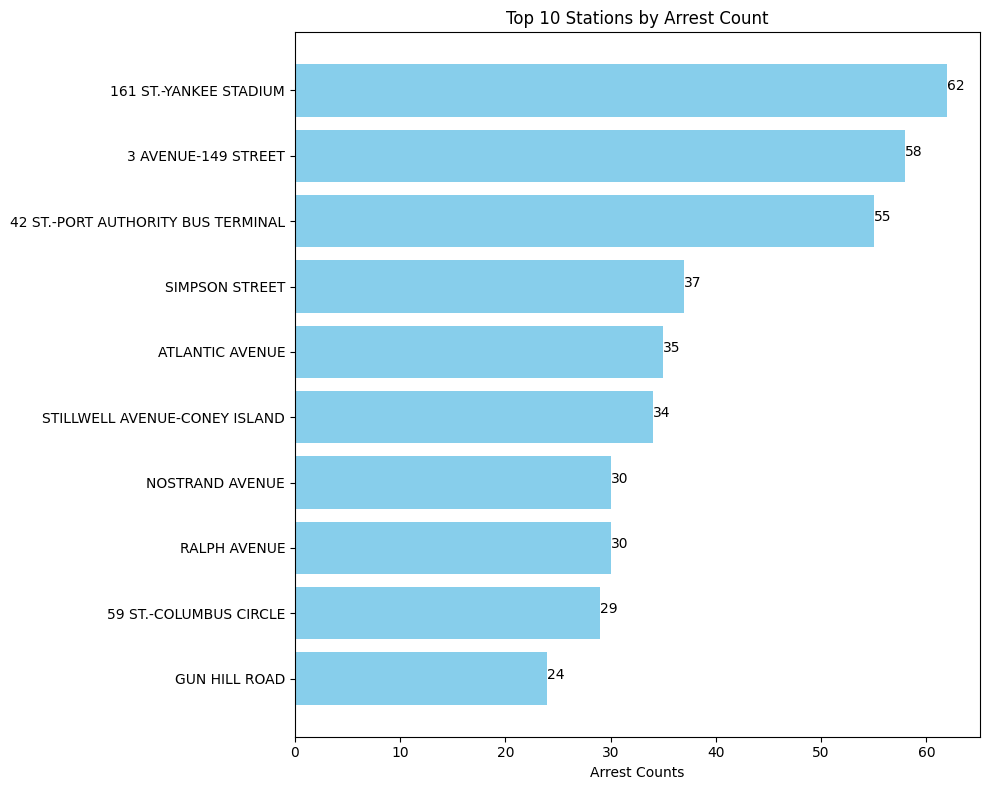

In [27]:
# Sort the station_counts dictionary by values in descending order
sorted_stations = sorted(station_counts.items(), key=lambda x: x[1], reverse=True)

# Extracting station names and counts for the top 10 stations
stations = [station for station, count in sorted_stations[:10]]
counts = [count for station, count in sorted_stations[:10]]

# Creating the horizontal bar chart without gridlines
plt.figure(figsize=(10, 8))
plt.barh(stations[::-1], counts[::-1], color='skyblue')
plt.xlabel('Arrest Counts')
plt.title('Top 10 Stations by Arrest Count')

# Displaying the count next to each bar for clarity
for index, value in enumerate(counts[::-1]):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()